<a href="https://colab.research.google.com/github/N1a2t3a/.Data_Science/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частина 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
def create_model(model_type, num_layers, num_neurons, activation_function, optimizer_type):
    if model_type == "dense":
        model = models.Sequential()
        model.add(layers.Flatten(input_shape=(28, 28)))

        for _ in range(num_layers):
            model.add(layers.Dense(num_neurons, activation=activation_function))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(0.3))

        model.add(layers.Dense(10, activation='softmax'))
    elif model_type == "cnn":
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(num_neurons, activation='relu'))
        model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer_type,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
def train_model(model, train_images, train_labels, epochs, batch_size):
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return history

In [ ]:
def plot_results(history, model_type, num_layers, num_neurons, activation_function, optimizer_type):
    plt.plot(history.history['accuracy'], label=f'{model_type.capitalize()} Training Accuracy ({num_layers} layers, {num_neurons} neurons, {activation_function}, {optimizer_type})')
    plt.plot(history.history['val_accuracy'], label=f'{model_type.capitalize()} Validation Accuracy ({num_layers} layers, {num_neurons} neurons, {activation_function}, {optimizer_type})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

In [ ]:
model_types = ["dense", "cnn"]
num_layers_list = [2, 3]
num_neurons_list = [128, 256]
activation_functions = ['relu', 'sigmoid']
optimizers_list = ['adam', 'sgd']

In [ ]:
epochs = 10
batch_size = 64

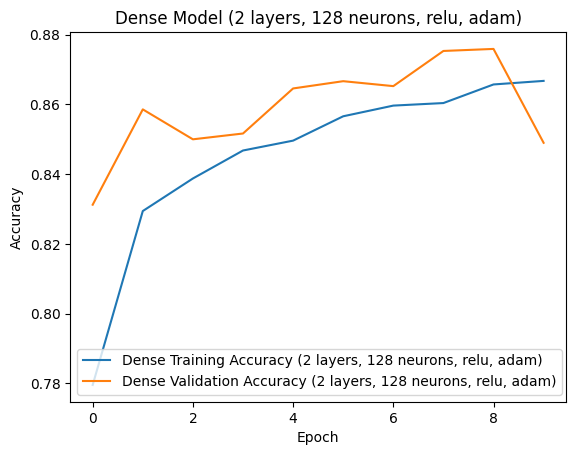

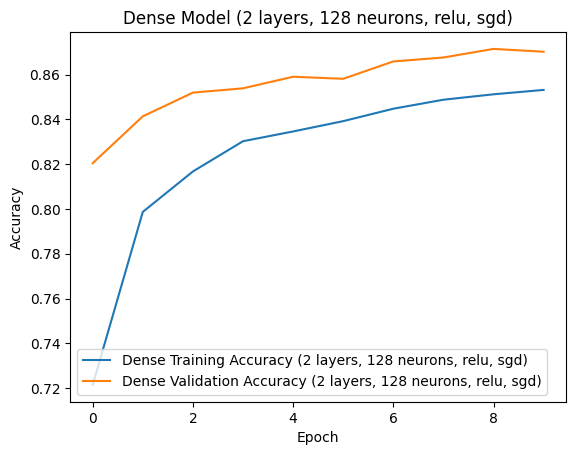

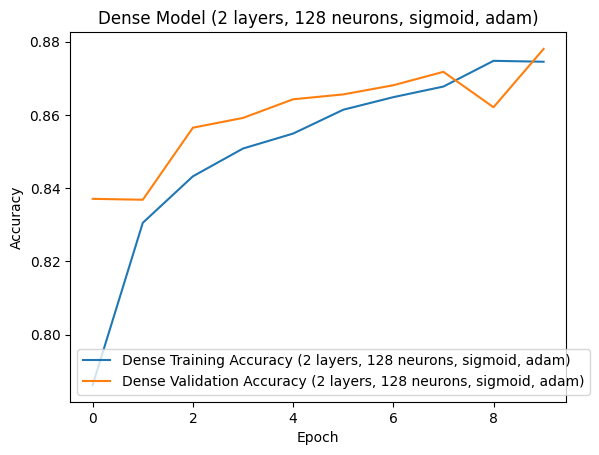

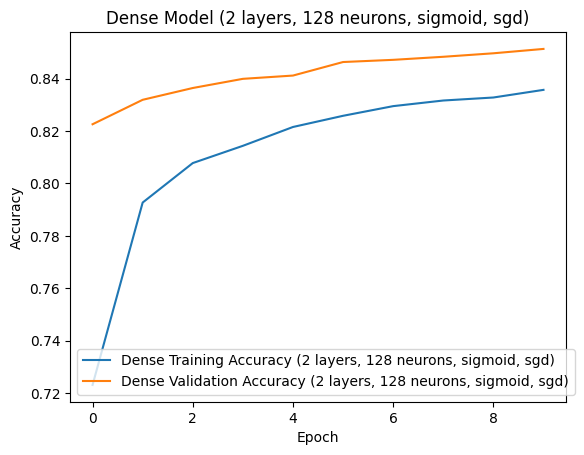

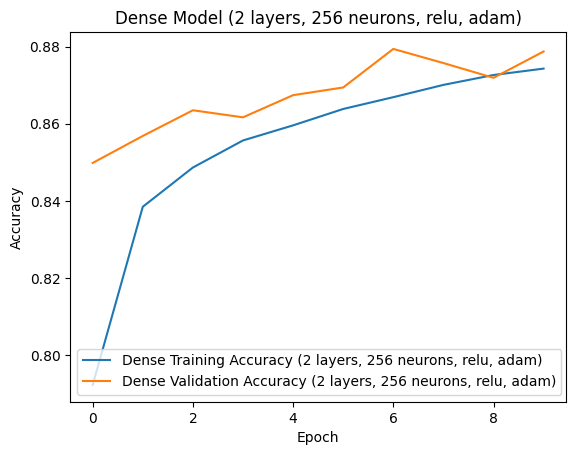

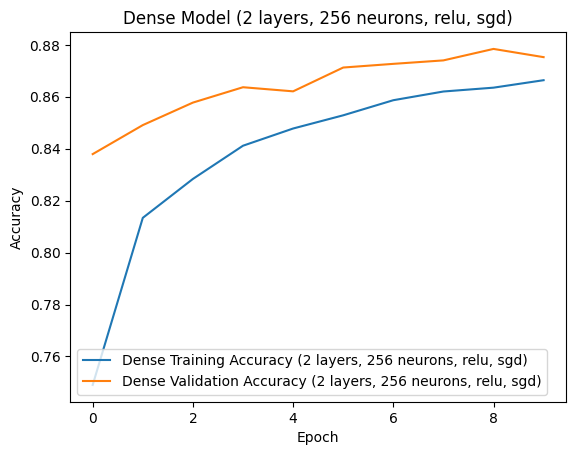

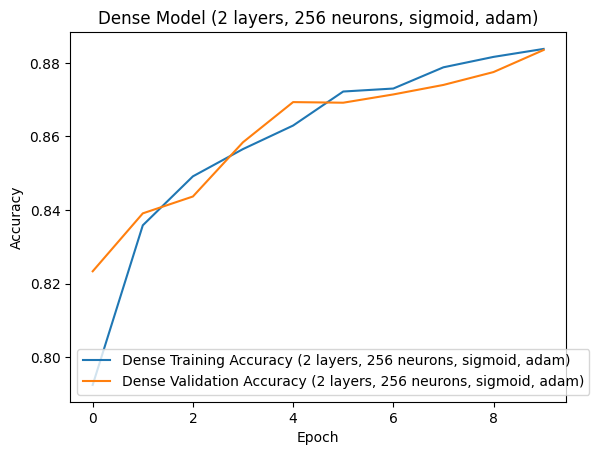

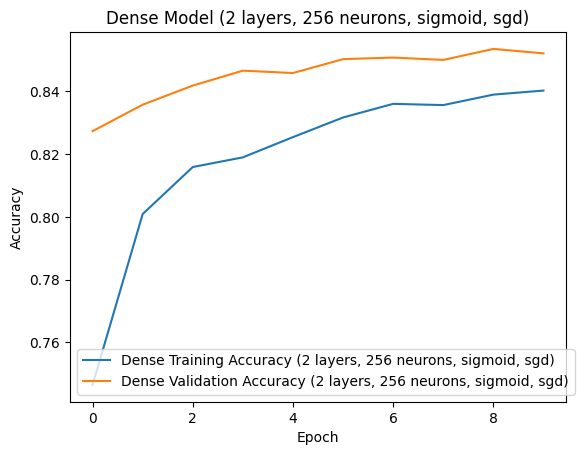

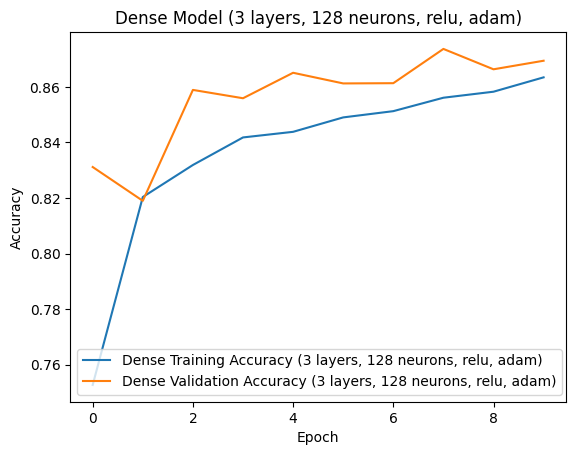

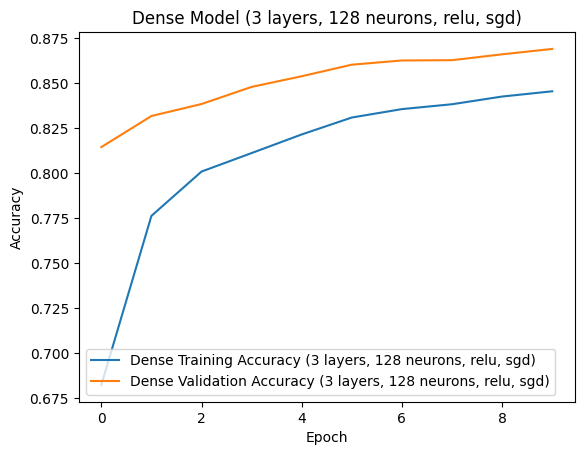

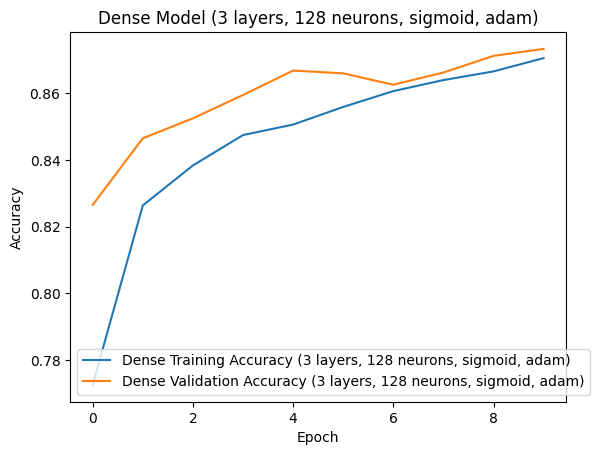

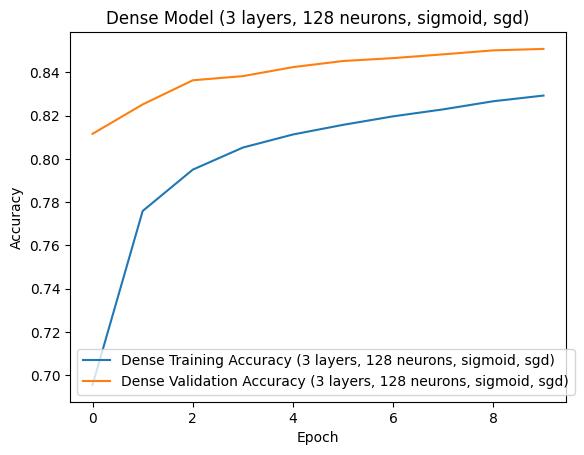

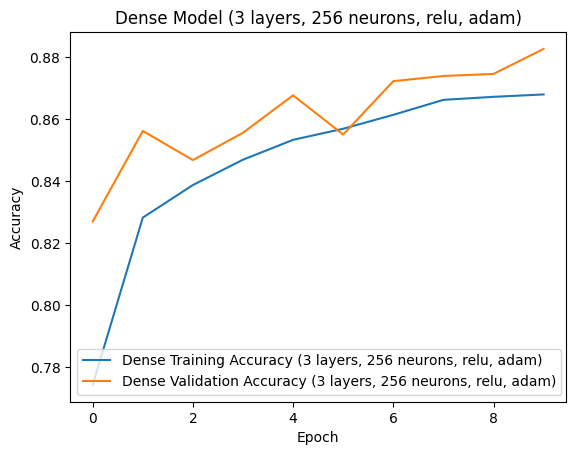

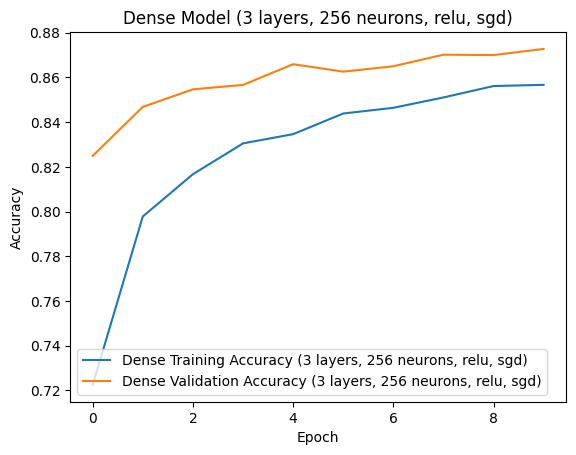

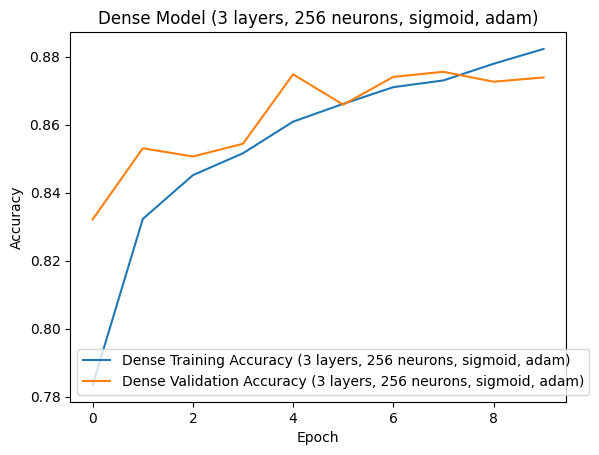

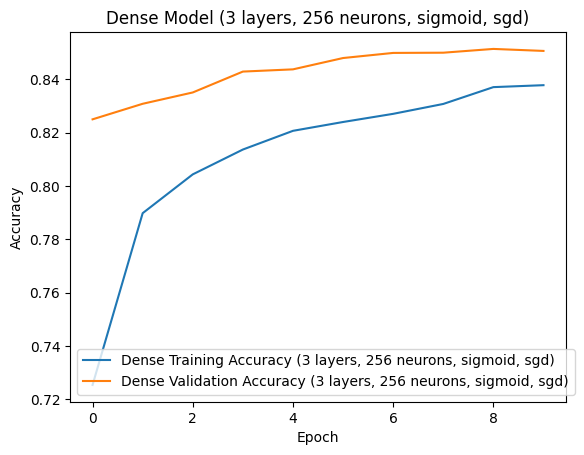

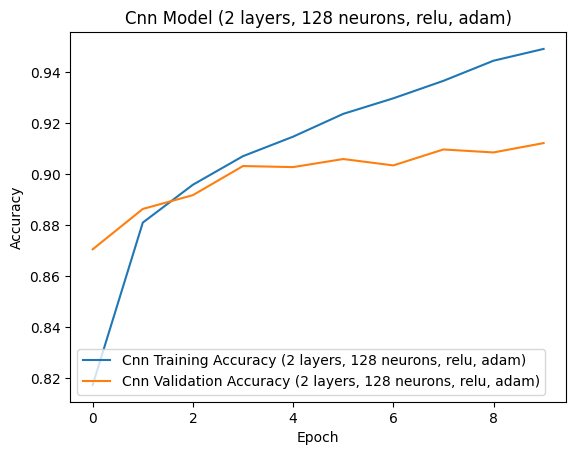

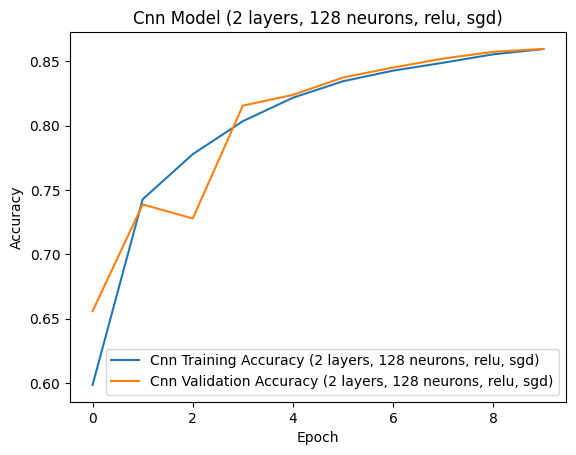

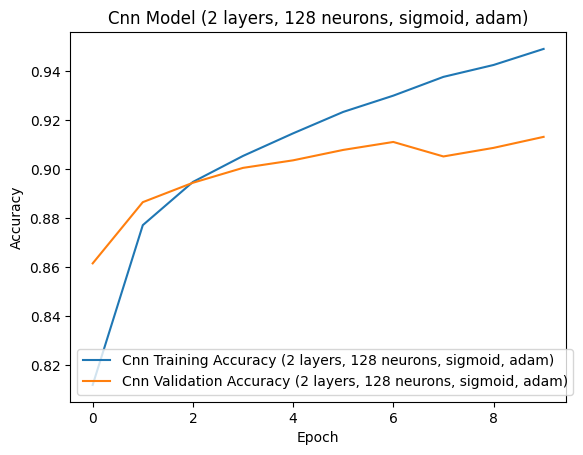

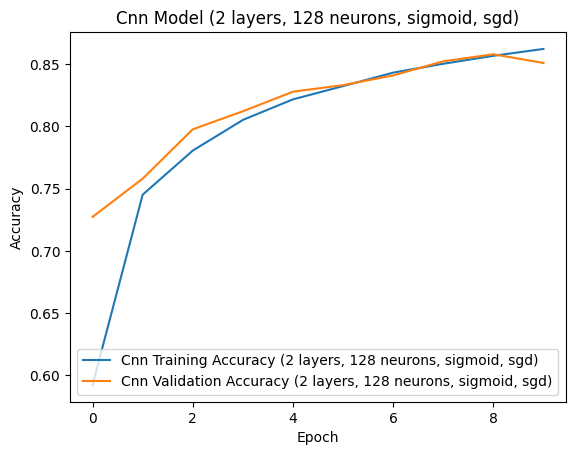

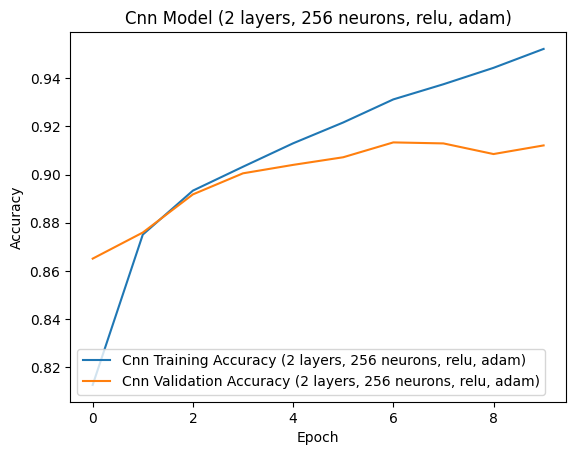

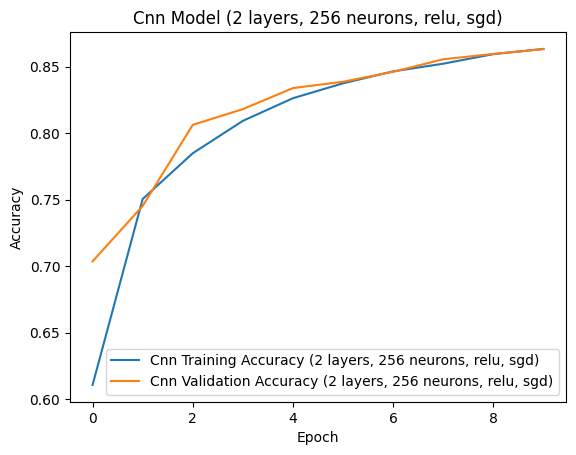

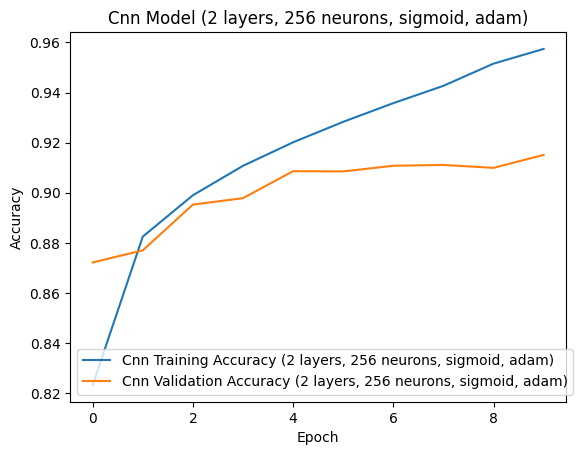

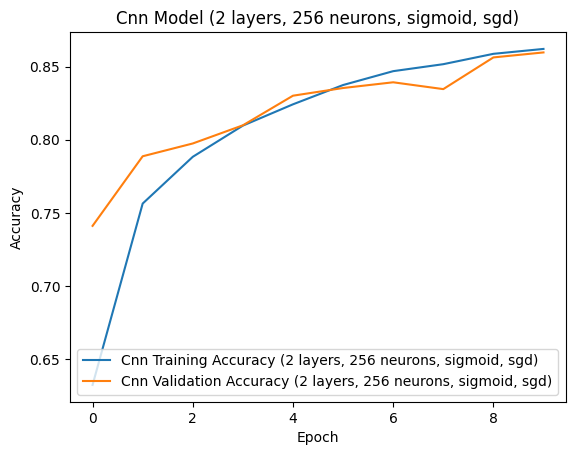

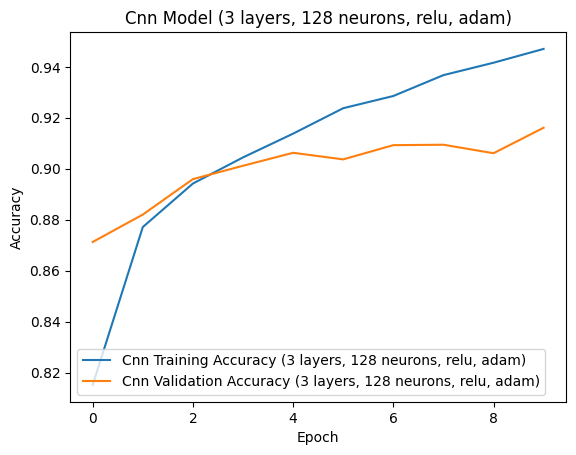

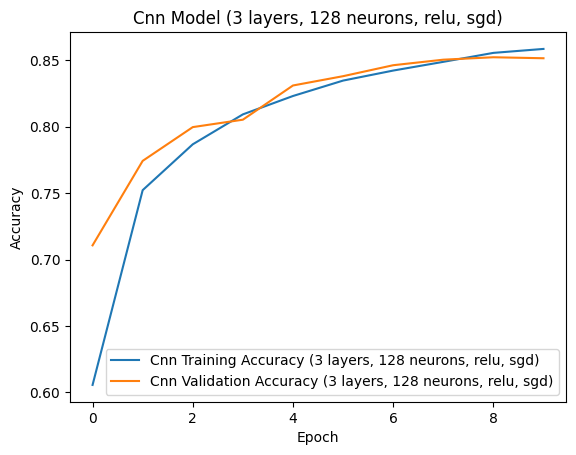

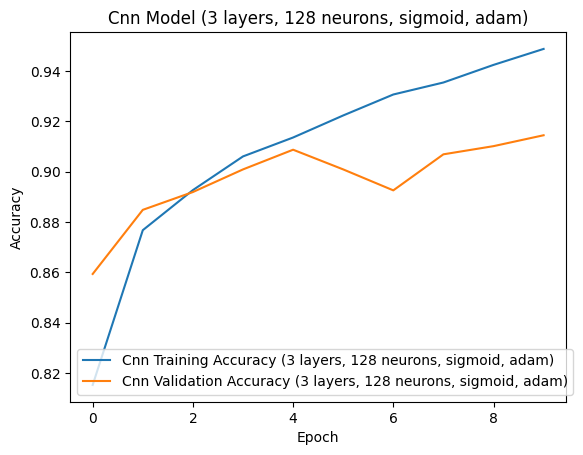

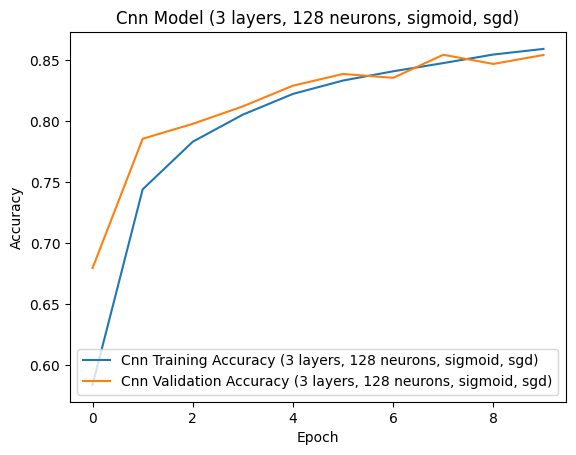

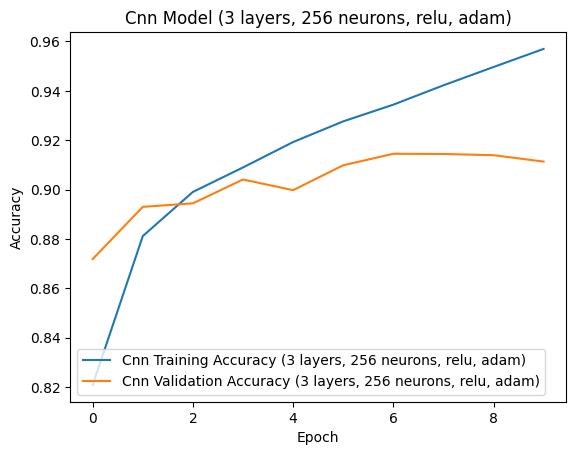

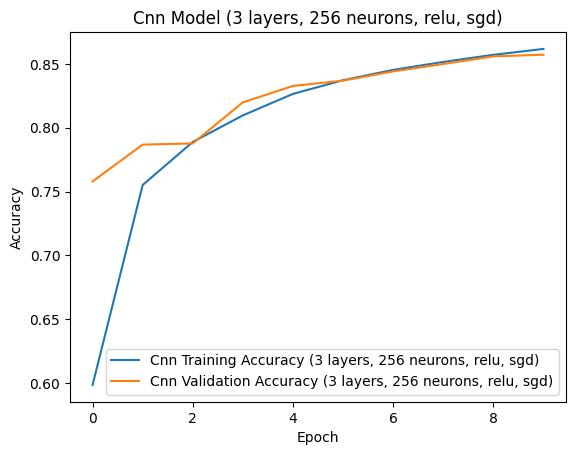

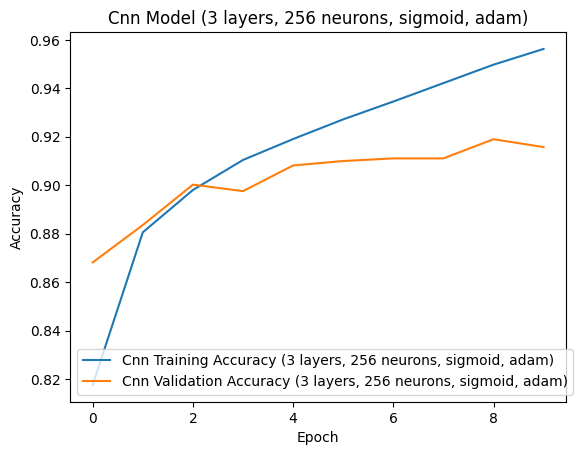

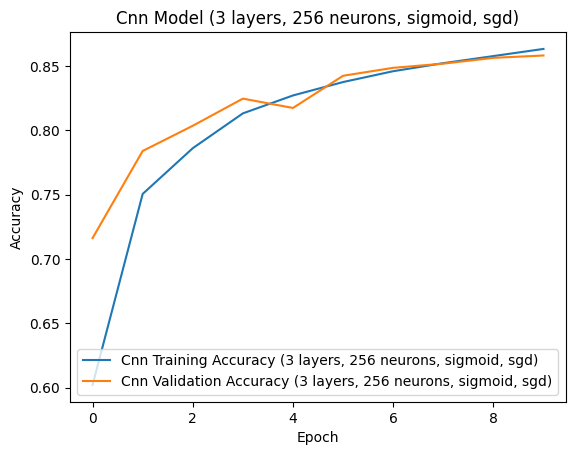

In [ ]:
for model_type in model_types:
    for num_layers in num_layers_list:
        for num_neurons in num_neurons_list:
            for activation_function in activation_functions:
                for optimizer_type in optimizers_list:
                    model = create_model(model_type, num_layers, num_neurons, activation_function, optimizer_type)
                    history = train_model(model, train_images, train_labels, epochs, batch_size)
                    plot_results(history, model_type, num_layers, num_neurons, activation_function, optimizer_type)
                    plt.title(f'{model_type.capitalize()} Model ({num_layers} layers, {num_neurons} neurons, {activation_function}, {optimizer_type})')
                    plt.show()

In [26]:
test_loss_dense, test_acc_dense = model.evaluate(test_images, test_labels)
print(f'Test Accuracy (Dense Model): {test_acc_dense}')

313/313 [==============================] - 4s 12ms/step - loss: 0.4058 - accuracy: 0.8519
Test Accuracy (Dense Model): 0.8518999814987183


# Частина 2

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [28]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)

In [30]:
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

In [31]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [32]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_images)

In [33]:
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [34]:
model = create_vgg16_model()
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=10,
                    validation_data=(test_images, test_labels), verbose=1)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - ETA: 0s - loss: 0.8085 - accuracy: 0.7122

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss_cnn, test_acc_cnn = model.evaluate(test_images, test_labels)
print(f'Test Accuracy (CNN Model with VGG16): {test_acc_cnn}')

313/313 [==============================] - 2s 8ms/step - loss: 0.2976 - accuracy: 0.9158
Test Accuracy (CNN Model with VGG16): 0.9157999753952026
